In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Helpful methods
# assume df is actual data frame
df = pd.DataFrame()
# changing an index to datetime
df.index = pd.to_datetime(df.index)

# Plotting data
df.plot()

# Joining dataframes
df1.join(df2)

# Resampling data 
df = df.resample(rule='W', how='last')

# Computing percent changes and differences of a time series
df['col'].pct_change()
df['col'].diff() # .diff(n)

# pandas correlation method of Series
correlation = df['ABC'].corr(df['XYZ'])

# autocorrelation
df['ABC'].autocorr()

# Plot correlation
plt.scatter(df['col1'], df['col2'])
plt.show()

In [ ]:
# Linear Regression

# statsmodels
import statsmodels.api as sm
sm.OLS(y, x).fit()

# numpy
import numpy as np
np.polyfit(x, y, deg=1)

# pandas
import pandas as pd
pd.ols(y, x)

# scipy
from scipy import stats
stats.linregress(x, y)

In [ ]:
# Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x, lags=20, alpha=0.05) # alpha - width of confidence interval +-2/sqtr(N) ~ 95%

from statsmodels.tsa.stattools import acf
print(acf(x))

In [9]:
# Augumented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
ad = adfuller(x)
# if ad ~ 0 => then x is a random walk, if ad < 0 => then x is not a random walk

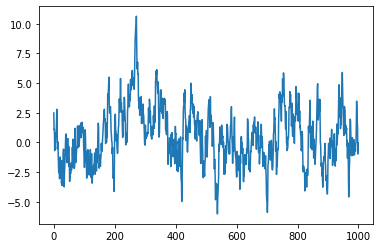

In [12]:
# Auto Regressive Model
# -1 < fi < 1 => stationarity
# fi < 0 => Mean Reversion
# fi > 0 => Momentum

# Simulating an AR Process
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1, -0.9])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

In [24]:
# Estimating an AR Model
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1,0))
result = mod.fit()
print(result.summary())
print(result.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1430.625
Method:                       css-mle   S.D. of innovations              1.011
Date:                Tue, 09 Jun 2020   AIC                           2867.251
Time:                        22:26:15   BIC                           2881.974
Sample:                             0   HQIC                          2872.847
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5048      0.327      1.544      0.123      -0.136       1.146
ar.L1.y        0.9031      0.013     66.987      0.000       0.877       0.930
                                    Roots           

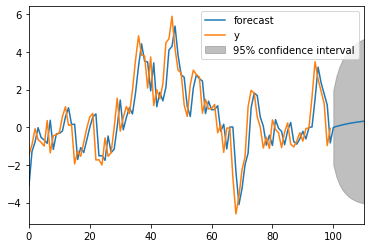

In [25]:
# Forecasting an AR Model
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1,0))
result = mod.fit()
result.plot_predict(start=900, end=1010)
plt.show()

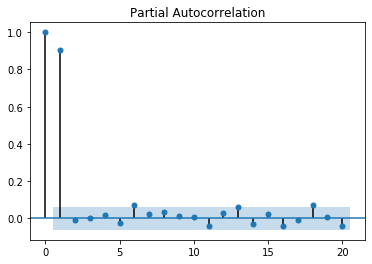

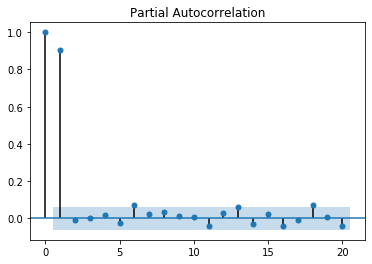

In [26]:
# Choosing the right model
# Plot PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(simulated_data, lags=20, alpha=0.05)

In [28]:
# Fitting AR Model
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1,0))
result = mod.fit()
# Get summary
result.summary()
# Just parameters
result.params
# Get the AIC and BIC
result.aic
result.bic

2881.97417775806

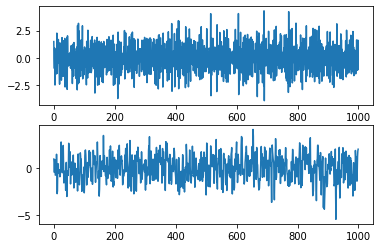

In [29]:
# MA - Moving Average
# Simulating MA(1) Time Series
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

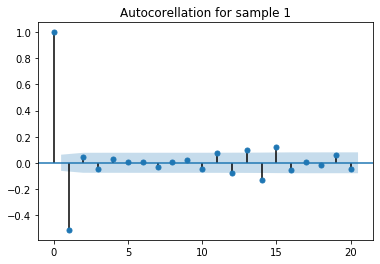

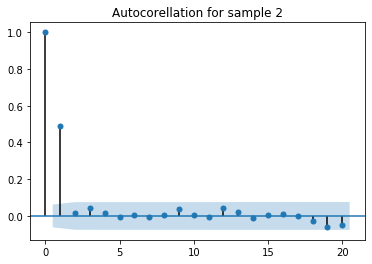

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
# Lag 1 = 1/(1 + θ^2)
plot_acf(simulated_data_1, lags=20, title="Autocorellation for sample 1") # θ = -0.9
plot_acf(simulated_data_2, lags=20, title="Autocorellation for sample 2") # θ = 0.9
plt.show()

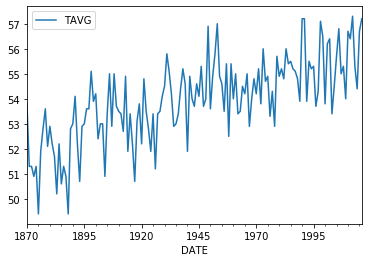

P-value :(-1.3978761406265345, 0.5832938987871152, 7, 139, {'1%': -3.4782936965183815, '5%': -2.882567574015525, '10%': -2.5779830117488745}, 436.6711273667221)


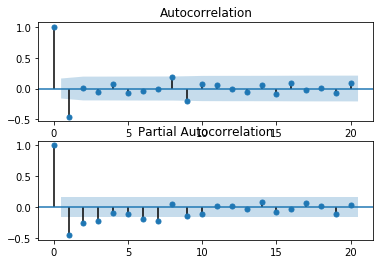

ValueError: The given frequency argument could not be matched to the given index.

In [50]:
# Workflow for example time series
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('./NOAA_TAVG.csv', index_col='DATE')

# df.index = df['DATE']
# Convert index to a datetime object
df.index = pd.to_datetime(df.index, format='%Y')

# Plot time series
df.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(df['TAVG'])
print(f"P-value :{result}")

# Making dataset stationary
chg = df.diff()
# drop None values
chg = chg.dropna()

fig, axes = plt.subplots(2, 1)
# Plot the ACF
plot_acf(chg, lags=20, ax=axes[0])
# Plot the PACF
plot_pacf(chg, lags=20, ax=axes[1])
plt.show()

# Choosing the best models
mod_ar1 = ARMA(chg, order=(1,0), freq='A')
res_ar1 = mod_ar1.fit()
print(f"AIC for AR(1) is: {res_ar1.aic}")

mod_ar2 = ARMA(chg, order=(2,0), freq='A')
res_ar2 = mod_ar2.fit()
print(f"AIC for AR(2) is: {res_ar2.aic}")

mod_arma11 = ARMA(chg, order=(1,1), freq='A')
res_arma11 = mod_arma11.fit()
print(f"AIC for AR(3) is: {res_arma11.aic}")

# choose minimal AIC value:
bm = min(res_ar1.aic, res_ar2.aic, res_arma11.aic)
print(f"Best AIC value is: {bm}")

# fit the best model
mod = ARIMA(df, order=(1,1,1))
res = mod.fit()

# Plot the original series and forecast
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()